In [1]:
%matplotlib inline
import random
import torch
import matplotlib.pyplot as plt
from d2l import torch as d2l

In [2]:
#构造数据集
def synthetic_data(w, b, num_examples):
    """生成 y = Xw + b +噪声。"""
    X = torch.normal(0, 1, (num_examples, len(w)))
    y = torch.matmul(X, w) + b
    y += torch.normal(0, 0.01, y.shape)
    return X, y.reshape((-1, 1))
true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)

In [3]:
features[0]

tensor([-0.3704, -1.3501])

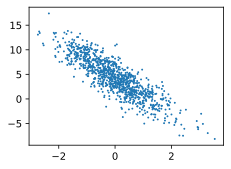

In [4]:
d2l.set_figsize()
plt.scatter(features[:,1].detach().numpy(),
               labels.detach().numpy(),1)

In [8]:
def date_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        batch_indices = torch.tensor(indices[i:min(i + batch_size, num_examples)])
        yield features[batch_indices], labels[batch_indices]
batch_size = 10

for X, y in date_iter(batch_size, features, labels):
    print(X,'/n', y)
    break


tensor([[ 0.7460, -0.2287],
        [ 0.6485,  1.6455],
        [ 1.9287,  0.2128],
        [ 0.0159,  3.2911],
        [-0.6670, -1.0436],
        [-1.2888,  0.0917],
        [ 1.3084, -0.2239],
        [ 1.3632, -0.2671],
        [-0.7418, -0.1574],
        [-0.0699, -1.3221]]) /n tensor([[ 6.4686],
        [-0.0964],
        [ 7.3232],
        [-6.9621],
        [ 6.4112],
        [ 1.3207],
        [ 7.5862],
        [ 7.8370],
        [ 3.2534],
        [ 8.5668]])


In [9]:
w = torch.normal(0, 0.01, size=(2, 1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

In [10]:
def linreg(X, w, b):
    return torch.matmul(X, w) + b

In [14]:
def squared_loss(y_hat, y):
    return (y_hat - y.reshape(y_hat.shape))**2 / 2
def sgd(params, lr, batch_size):
    with torch.no_grad():
        for param in params:
            param -= lr * param.grad /batch_size
            param.grad.zero_()

In [15]:
lr = 0.03
num_epochs = 3
net = linreg
loss = squared_loss
for epoch in range(num_epochs):
    for X, y in date_iter(batch_size, features, labels):
        l = loss(net(X, w, b), y)
        l.sum().backward()
        sgd([w, b], lr, batch_size)
    with torch.no_grad():
        train_l = loss(net(features, w, b),labels)
        print(f'epoch {epoch + 1}, loss {float(train_l.mean()):f}')


epoch 3, loss 0.000052
